## Project Name: House Prices: Advanced Regression Techniques

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

## All the Lifecycle In A Data Science Projects
1. [Data Analysis](#sec1)
2. [Feature Engineering](#sec2)
3. [Feature Selection](#sec3)
4. [Model Building](#sec4)
5. [Model Deployment](#sec5)

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
dataset=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
## print shape of dataset with rows and columns
X = pd.concat([dataset,test], axis=0)
y = dataset[['SalePrice']]
print("train :",dataset.shape)
print("X :", X.shape)


train : (1460, 81)
X : (2919, 81)


In [3]:
## print the top5 records
dataset.set_index(['Id'],inplace=True)
X.set_index(['Id'],inplace=True)
X.drop('SalePrice',axis=1,inplace=True)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


<a id="sec1"></a>

# 1. Data Analysis

#### In Data Analysis We will Analyze To Find out the below stuff

1. [Categorisation of feature types](#sec1.1)
     * All The Numerical Variables:
         * Distinct numerical variables (high cardinality)
         * Continous numerical variables
     * All the temporal Variables
     * All the categorical Variables 
2. [Exploration of feature types](#sec1.2)



<a id="sec1.1"></a>


## 1.1 Categorisation of feature types

In [4]:
temporal_features = [feature for feature in X.columns if 'Yr' in feature or 'Year' in feature or 'Mo' in feature]
print("temporal_features: {}".format(len(temporal_features)))

temporal_features: 5


In [5]:
numeric_features = [feature for feature in X.columns if X[feature].dtype != 'O' and feature not in temporal_features]
print("numeric_features: {}".format(len(numeric_features)))

numeric_features: 31


In [6]:
categorical_features = [feature for feature in X.columns if X[feature].dtype == 'O']
print("categorical_features: {}".format(len(categorical_features)))

categorical_features: 43


In [7]:
distinct_numeric_features = [feature for feature in numeric_features if len(X[feature].unique())<25]
print("Discrete features Count: {}".format(len(distinct_numeric_features)))

Discrete features Count: 13


In [8]:
continious_numeric_features = [feature for feature in numeric_features if feature not in distinct_numeric_features]
print("continious_numeric_features Count: {}".format(len(continious_numeric_features)))

continious_numeric_features Count: 18


<a id="sec1.2"></a>


## 1.2. Exploration of feature types

<a id="sec56"></a>

### 1.2.1 temporal_features

For any biveriate analysis, we will use our train-set as we have sale-prices only for that set. 

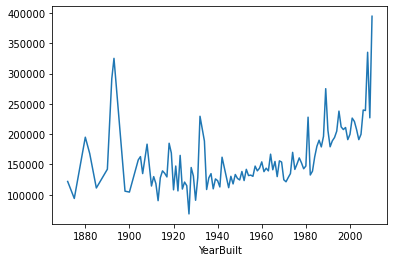

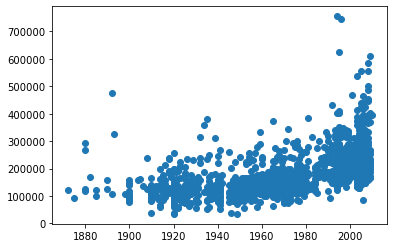

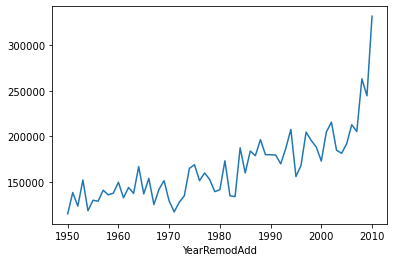

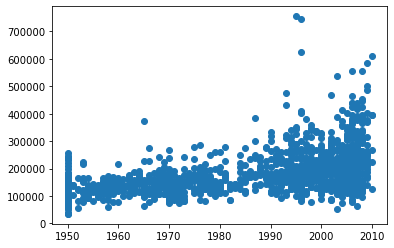

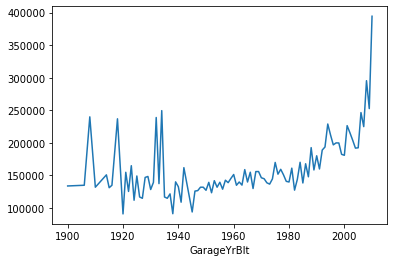

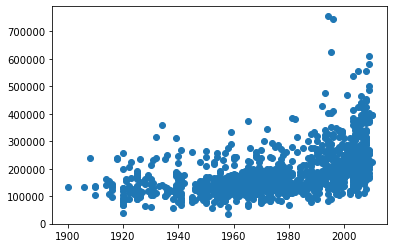

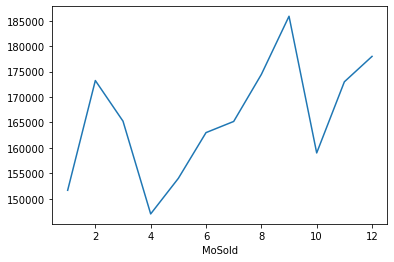

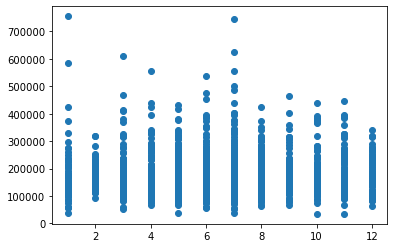

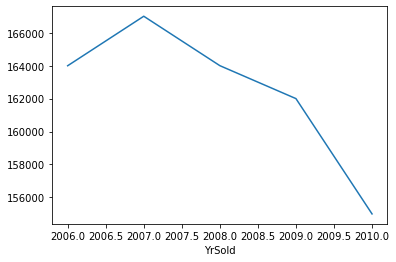

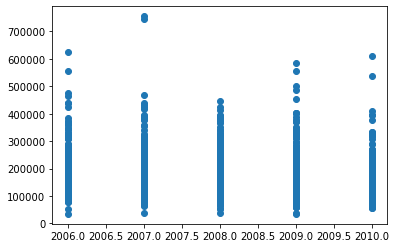

In [9]:
for feature in temporal_features: 
    dataset.groupby([feature])['SalePrice'].median().plot()
    plt.show()
    plt.scatter(dataset[feature],dataset['SalePrice'])
    plt.show()



### Oservations::

#### 1. Higher counts of houses build in recent years, with higher sales price!! 
       Age and sales price is -vely correlated
#### 2. More renovations are being done in recent years
       Renovations date and sale price -ve correlation. Meaning newer renovations cause higher Sales-price!! 
#### 3. Our sales data is from 2006 to 2010.


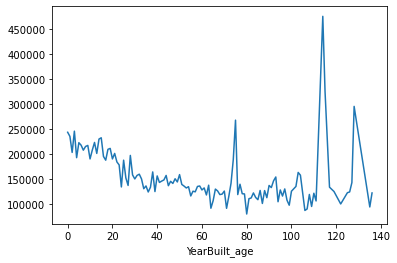

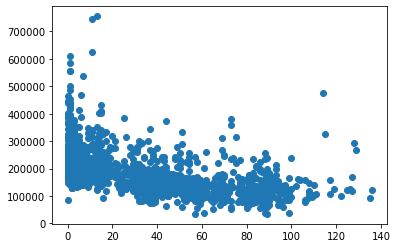

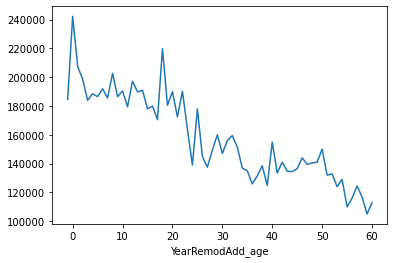

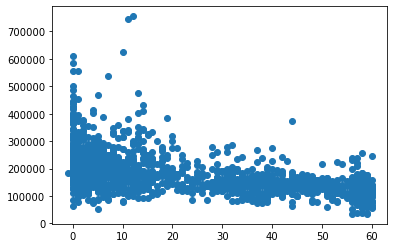

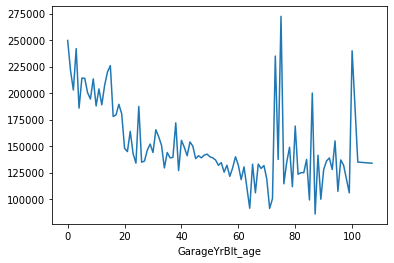

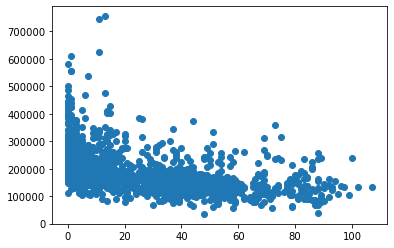

In [10]:
data = pd.concat([dataset[temporal_features],dataset['SalePrice']],axis=1).copy()
for feature in temporal_features:
    if feature == 'YrSold' or feature == 'MoSold':
        pass
    else:
        data[feature+'_age'] = data['YrSold'] - data[feature]
        data.groupby([feature+'_age'])['SalePrice'].median().plot()
        plt.show()
        plt.scatter(data[feature+'_age'],data['SalePrice'])
        plt.show()


        

Its clear that new refurbished houses and houses with less age have higher value!! apart from outliers and other factors such as antique houses which could cause those spikes on the right side of the graph!!

### 1.2.2 distinct_numeric_features

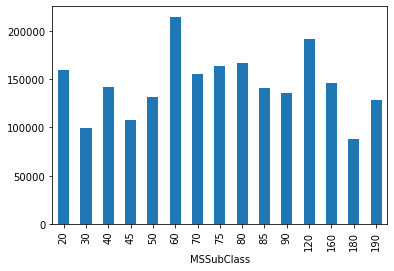

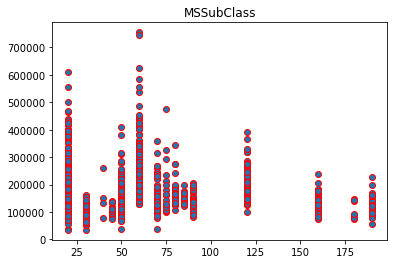

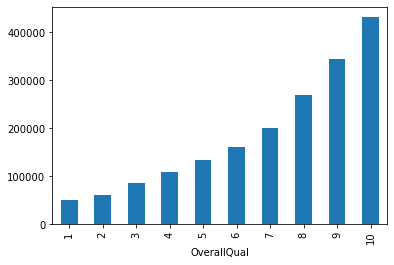

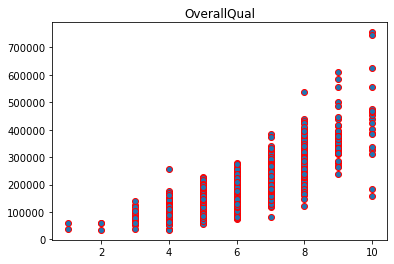

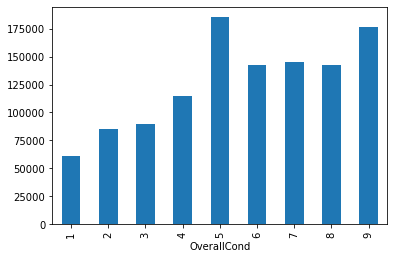

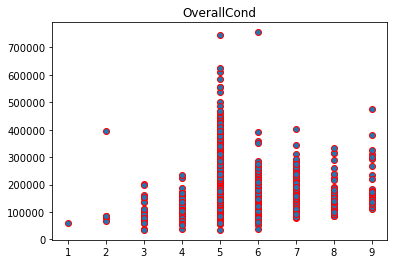

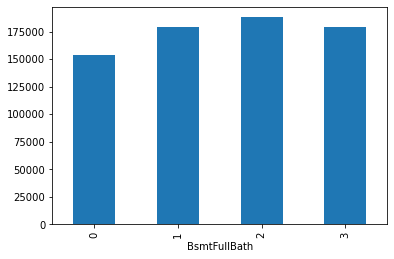

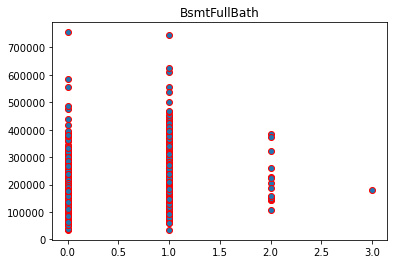

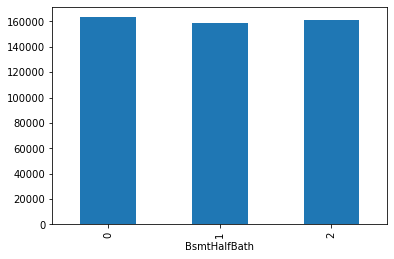

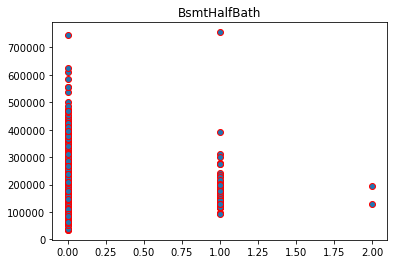

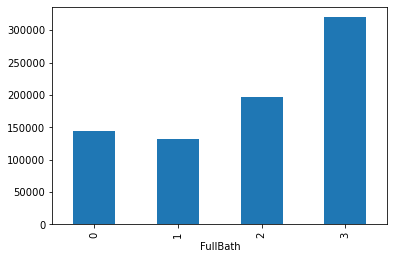

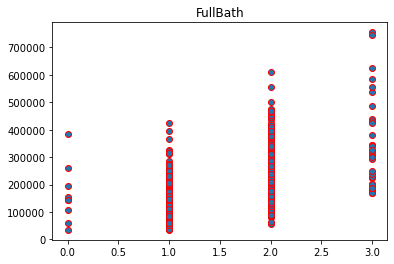

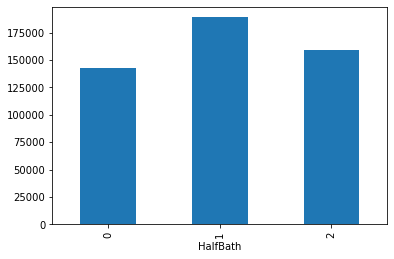

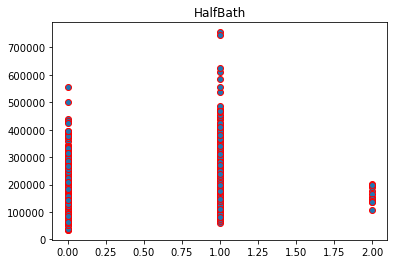

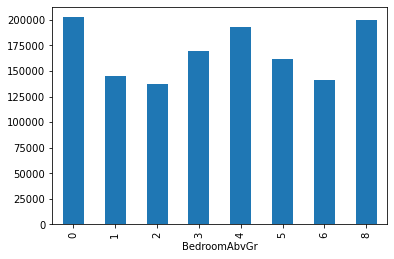

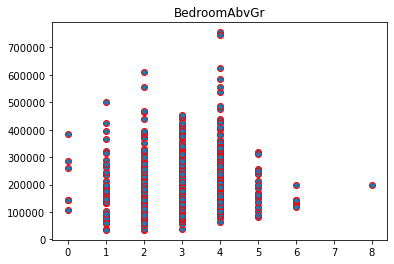

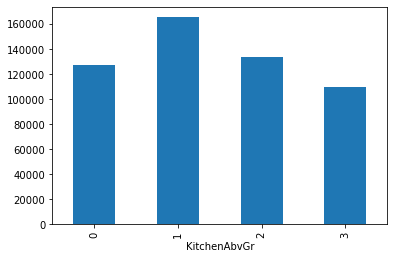

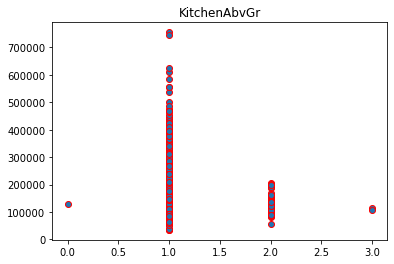

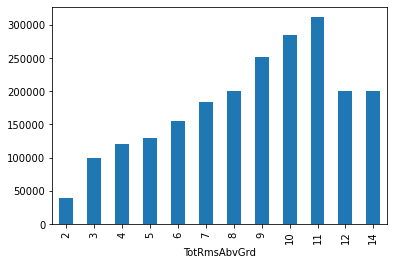

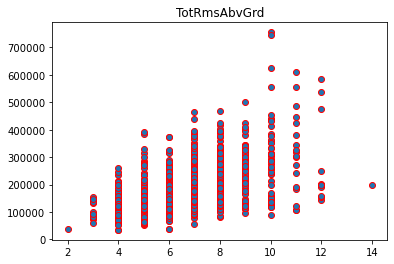

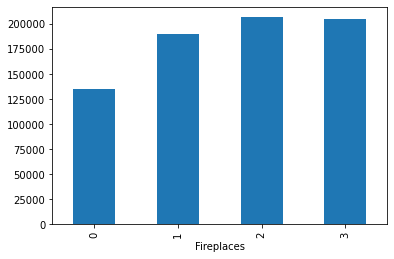

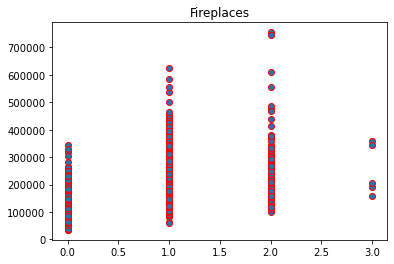

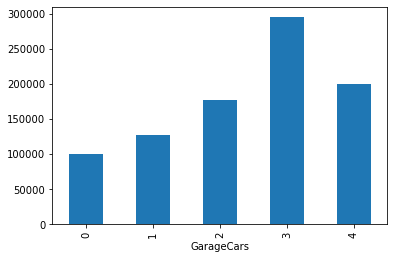

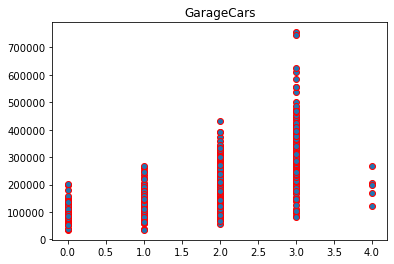

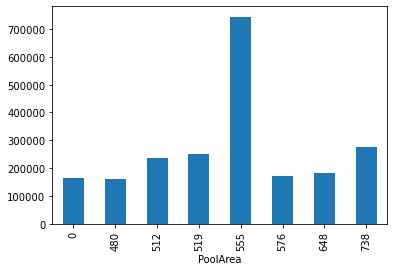

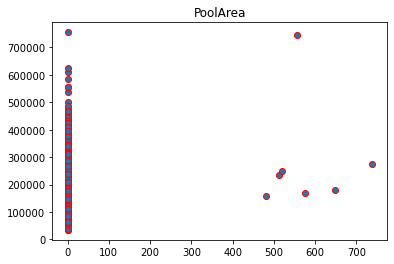

In [11]:
for feature in distinct_numeric_features: 
    dataset.groupby([feature])['SalePrice'].median().plot.bar()
    plt.show()
    plt.title(feature)
    plt.scatter(dataset[feature],dataset['SalePrice'],edgecolors='red')
    plt.show()


OBSERVATIONS:

1. we have noticed monotonic relationship in many features meaning these are ordinal_features!! 
2. Some unique-categories follow gausian distribution as we would expect low and high quality to be less in count.

<a id="sec55"></a>

## 1.2.3 continious_numeric_features

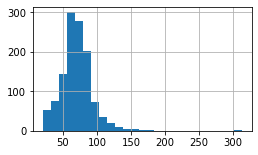

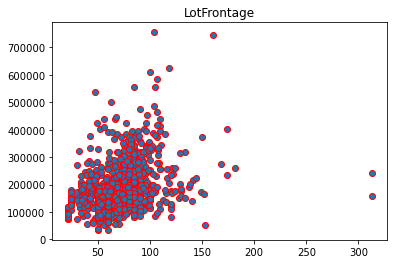

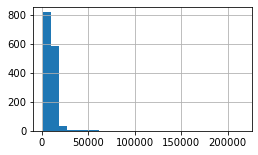

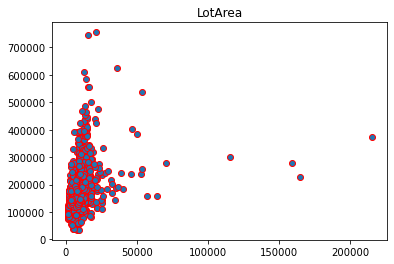

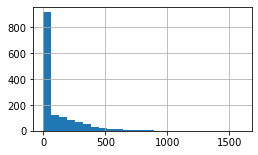

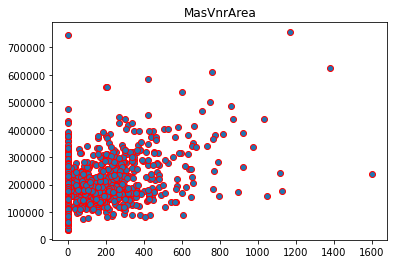

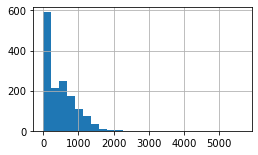

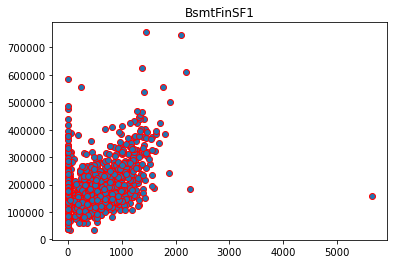

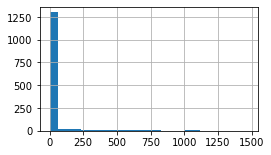

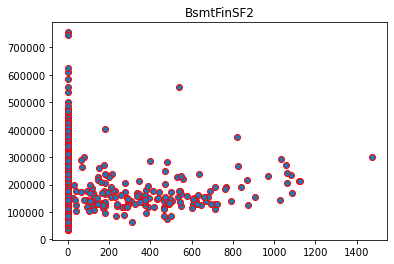

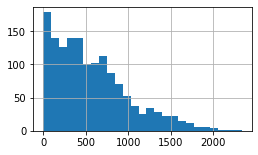

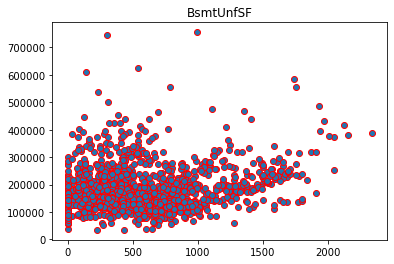

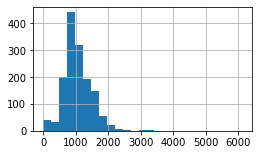

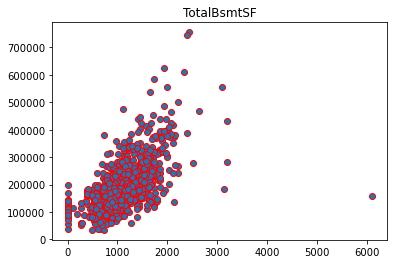

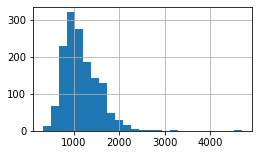

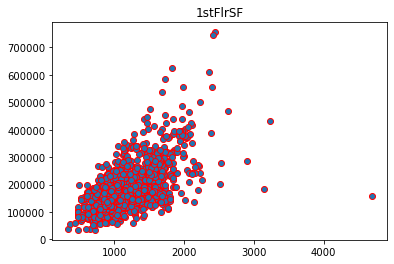

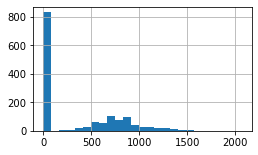

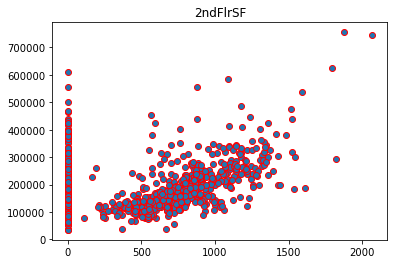

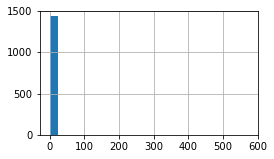

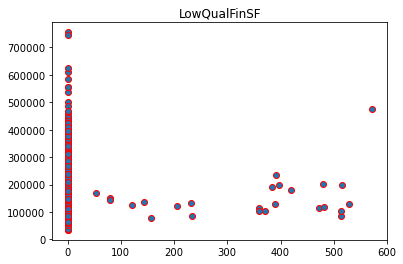

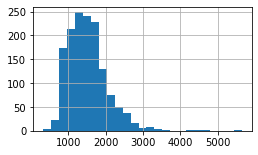

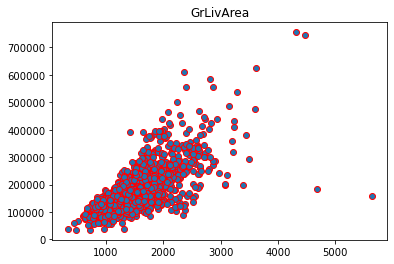

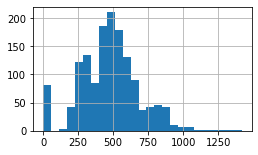

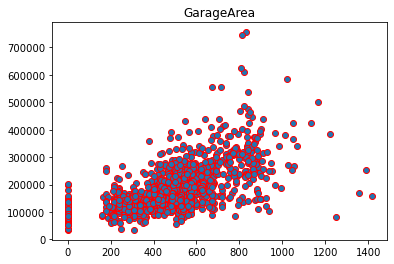

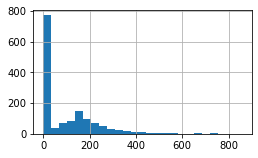

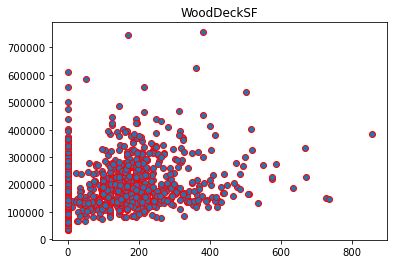

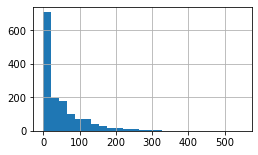

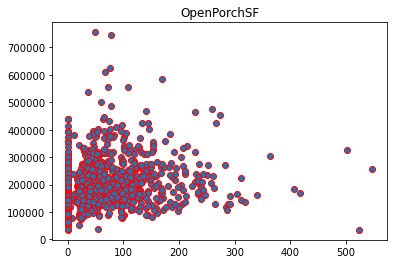

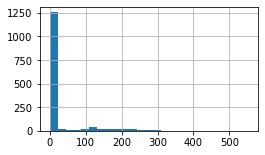

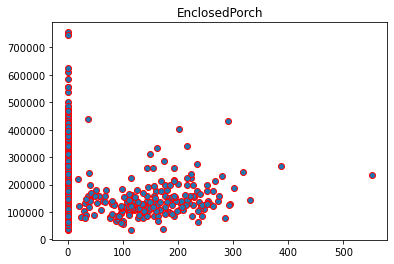

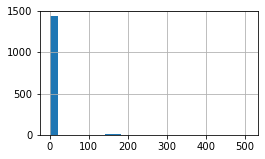

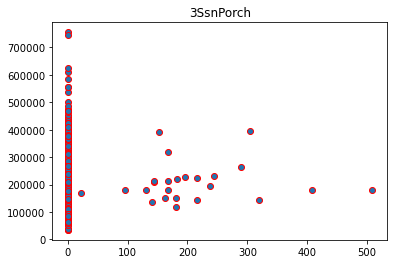

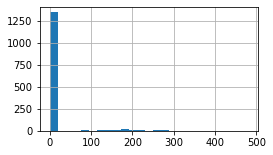

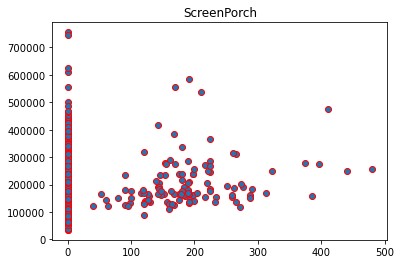

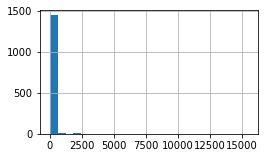

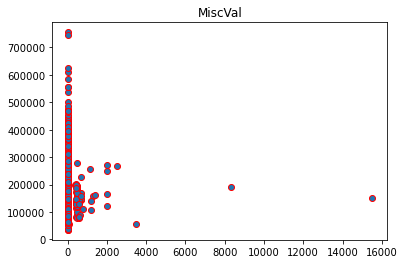

In [12]:
#for feature in continious_numeric_features: 
for index,feature in enumerate(continious_numeric_features):
    if feature == 'Id':
        pass
    else:
        fig = plt.figure(figsize=(18,16))
        plt.subplot(6,4,index+1)
        dataset[feature].hist(bins=25)
        plt.show()
        plt.title(feature)
        plt.scatter(dataset[feature],dataset['SalePrice'],edgecolors='red')
        plt.show()

fig.tight_layout(pad=1.0)

### Observation: 

1. Most of the above continous features are are right skewed. 
2. Many features only have Zeros as values!! (96% rule).
3. There are some Extreme outliers. Which can be safely removed

Lets try to perform log_transform and see how the data looks!!

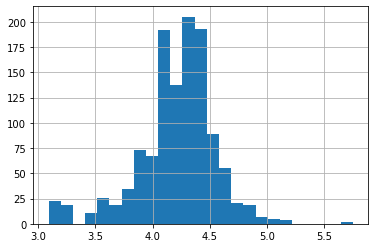

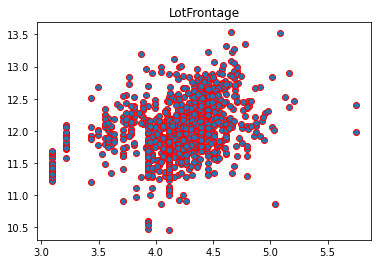

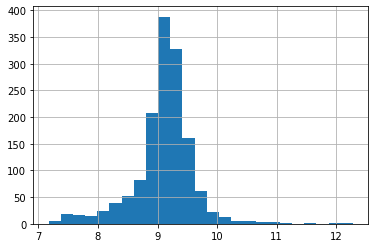

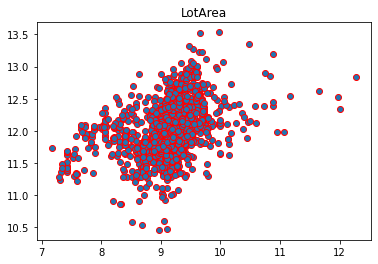

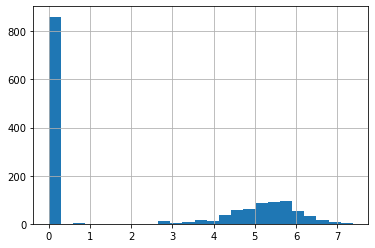

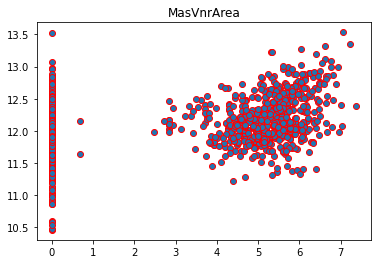

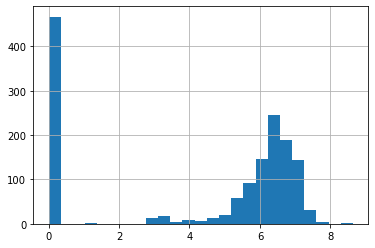

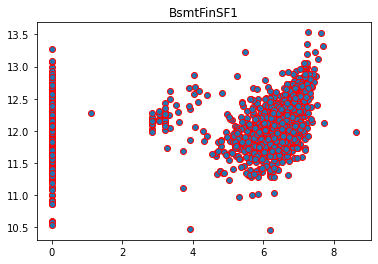

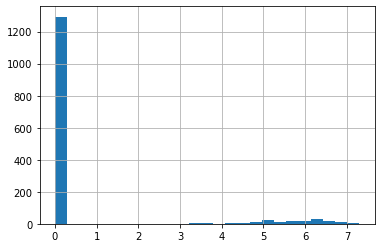

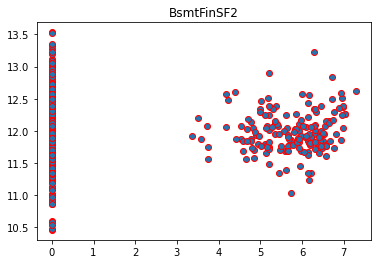

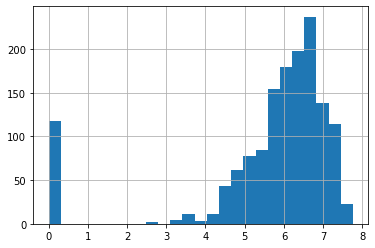

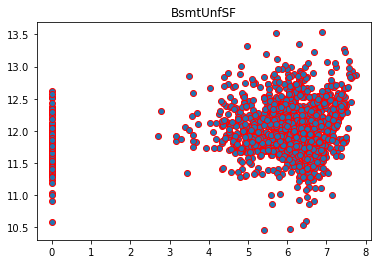

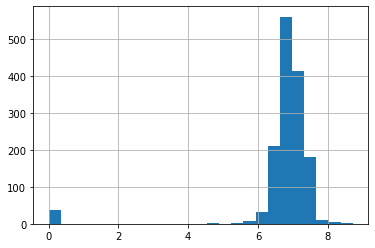

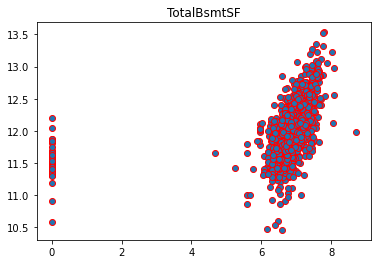

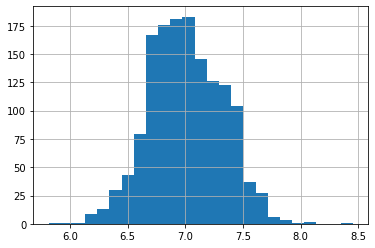

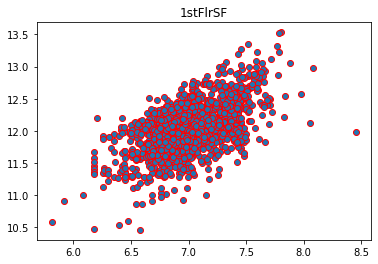

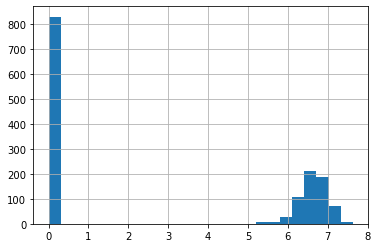

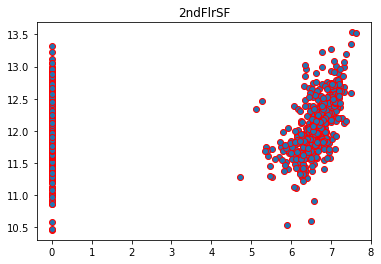

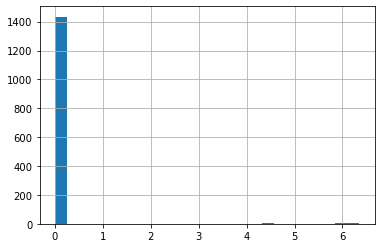

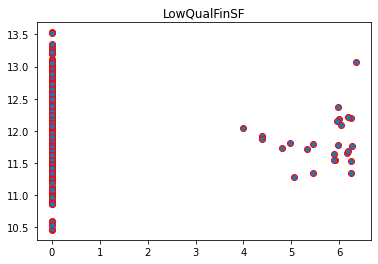

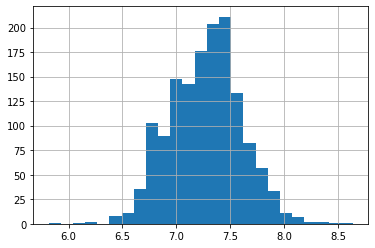

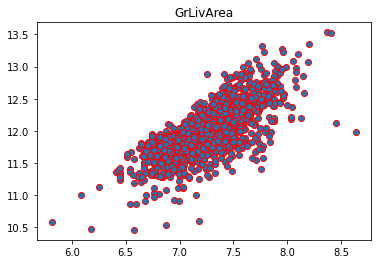

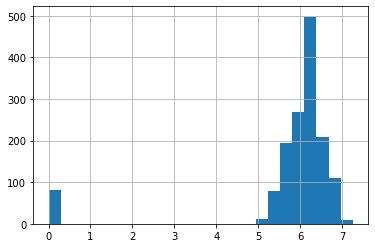

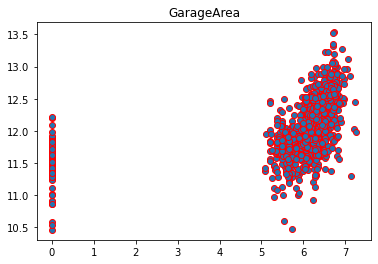

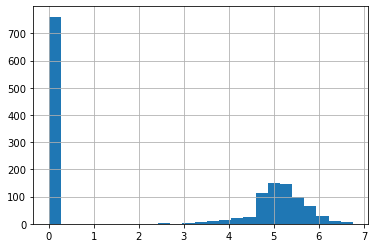

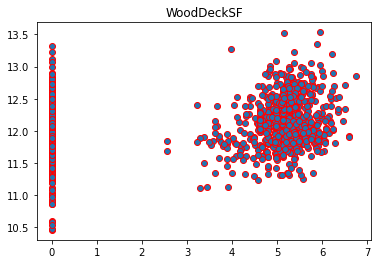

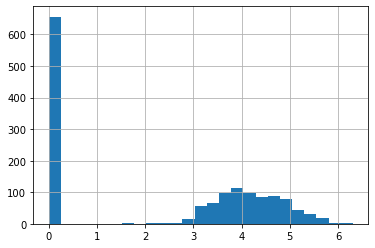

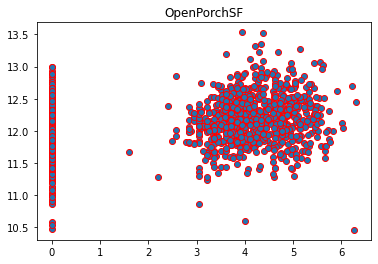

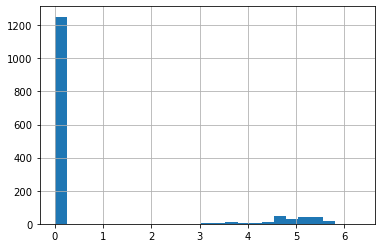

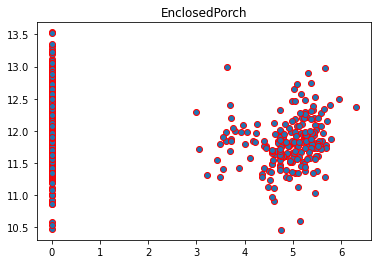

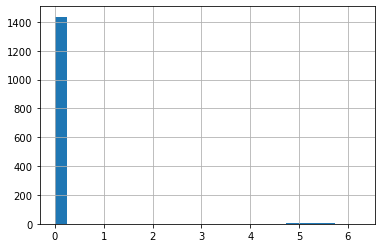

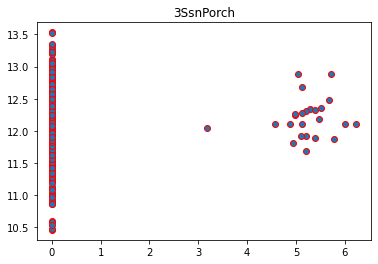

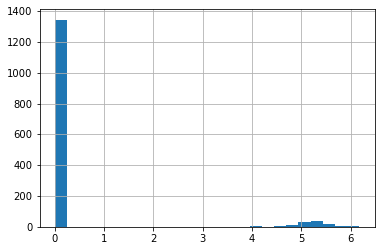

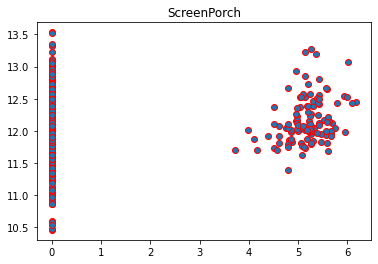

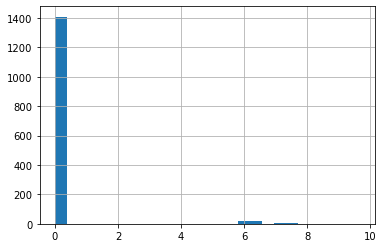

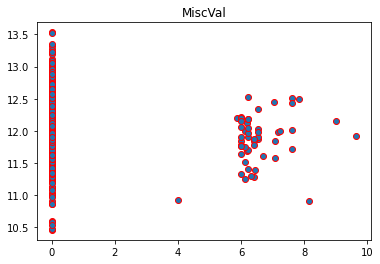

In [13]:
for feature in continious_numeric_features: 
    if feature == 'Id':
        pass
    #elif 0 in dataset[feature].unique():
        #pass
    else:
        np.log1p(dataset[feature]).hist(bins=25)
        plt.show()
        plt.title(feature)
        plt.scatter(np.log1p(dataset[feature]),np.log1p(dataset['SalePrice']),edgecolors='red')
        plt.show()


### Observation:

1. Data looks normally distributed.
2. Number of features have been reduced!! (Why?)  #####

#### Why we have many features with zero values when we expected +ve natural numbers only? Does zero mean something else? ######

In [14]:
O_numeric_features = []
for feature in continious_numeric_features: 
    if feature == 'Id':
        pass
    elif 0 in dataset[feature].unique():
        O_numeric_features.append(feature)
print(O_numeric_features)

['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


In [15]:
## checking the dataset
dataset[dataset['GarageArea']==0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


### Observation: 
    
1. It seems that 0 here indicates the missingness. Meaning the feature for the house is not present


<a id="sec1.2"></a>

## 1.2.4 categorical_features

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

In [17]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

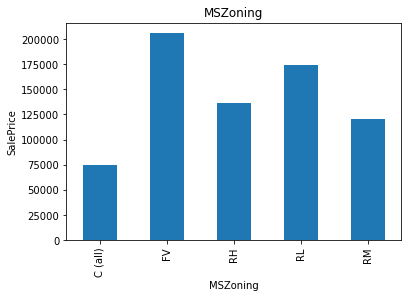

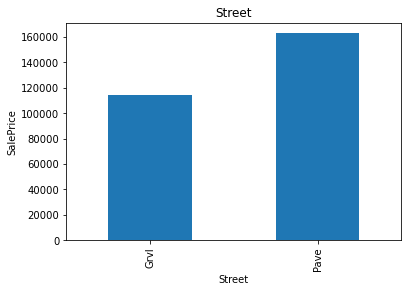

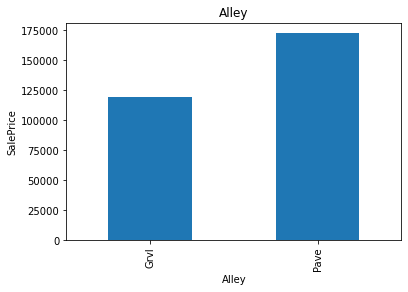

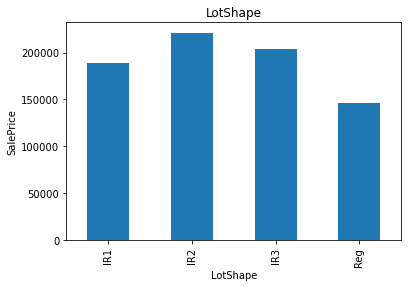

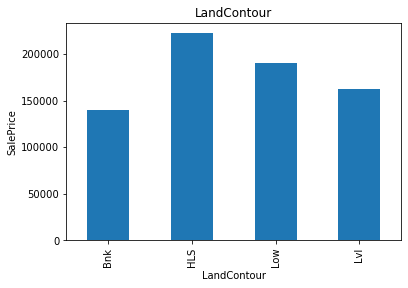

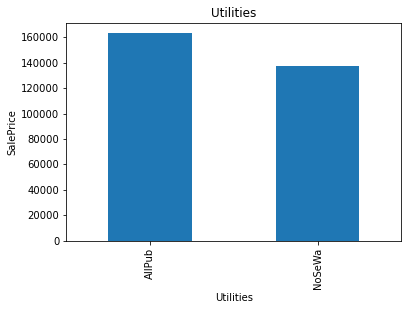

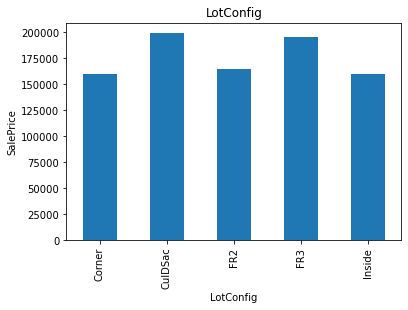

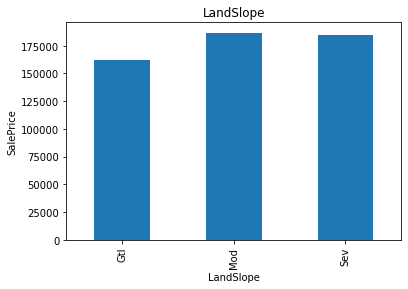

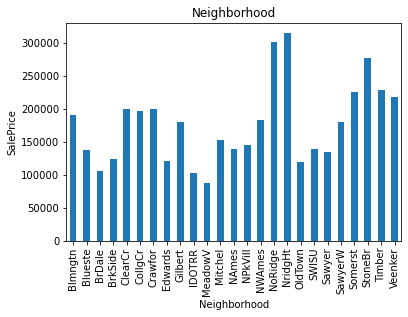

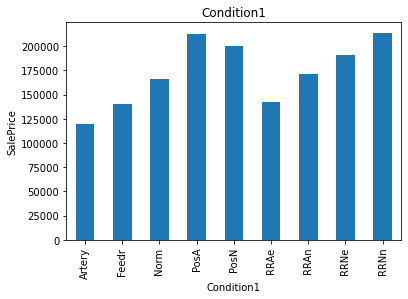

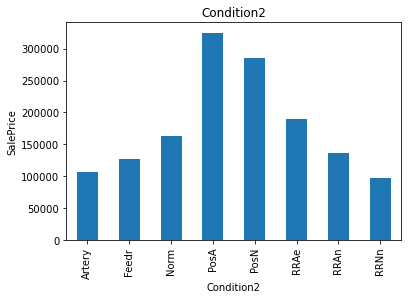

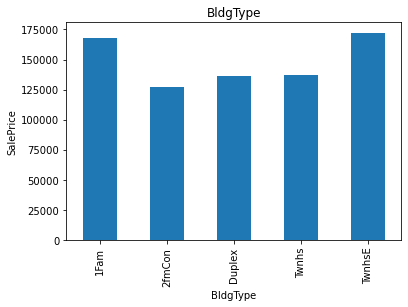

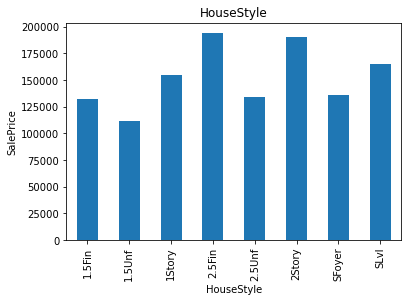

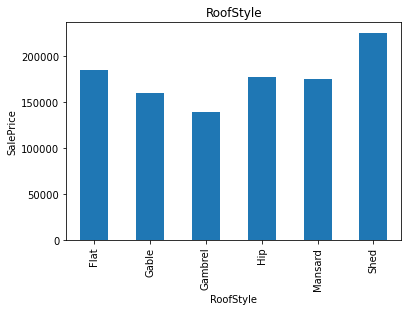

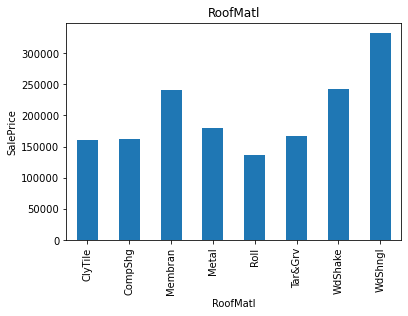

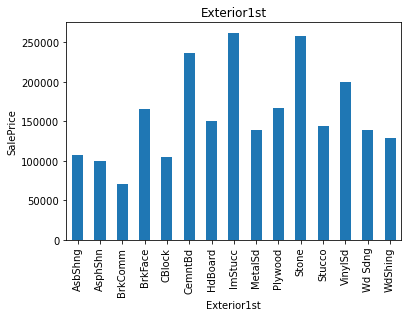

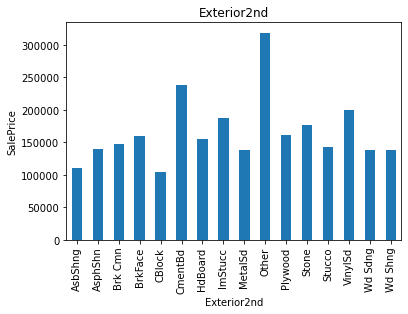

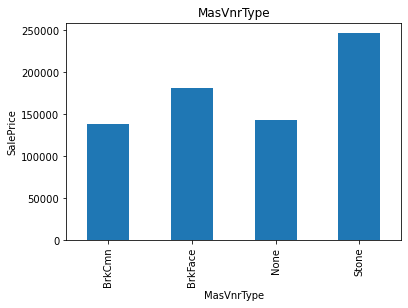

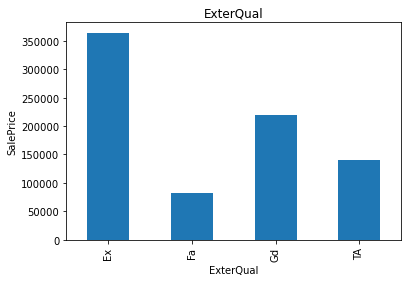

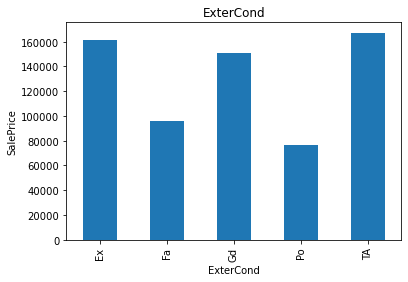

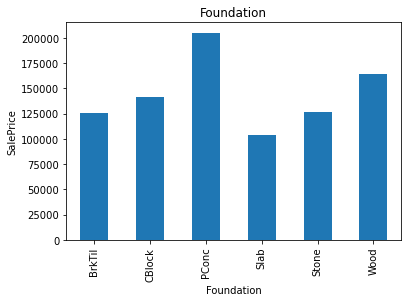

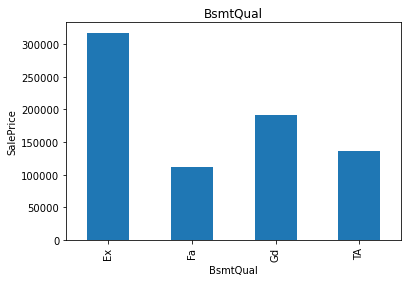

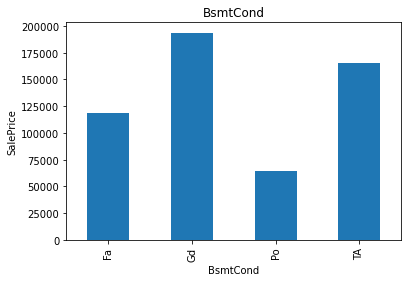

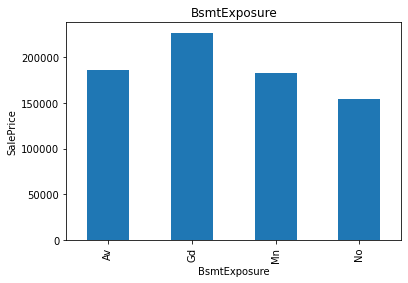

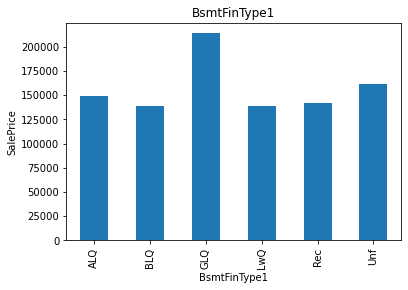

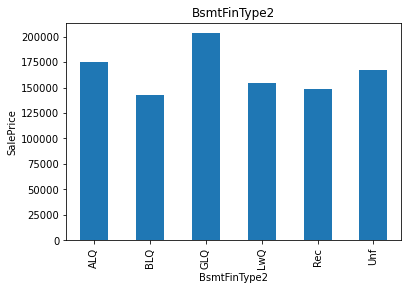

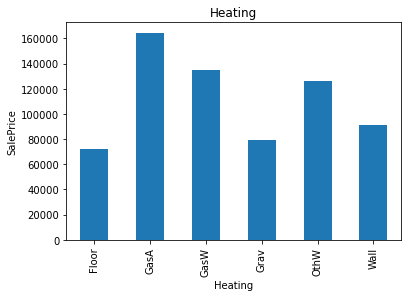

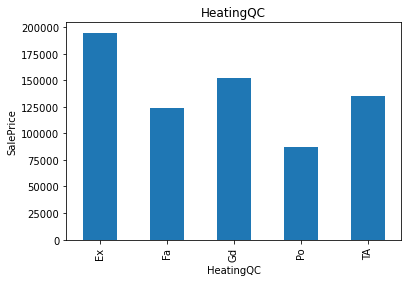

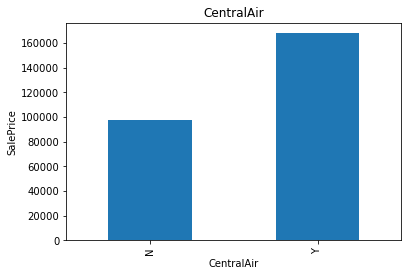

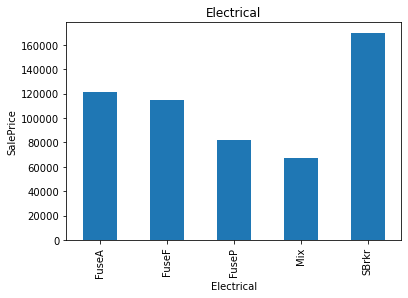

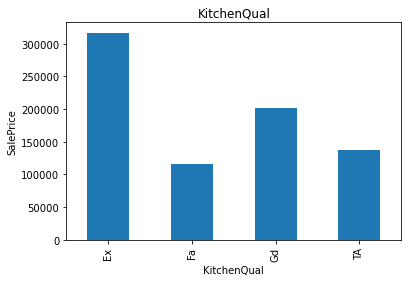

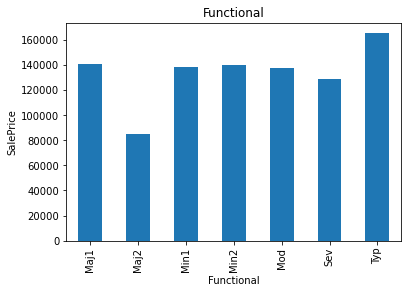

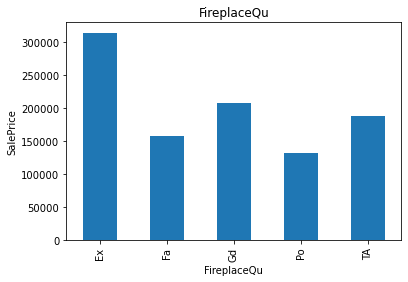

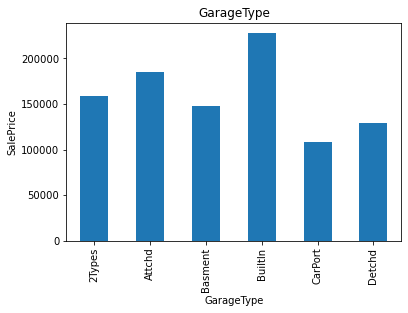

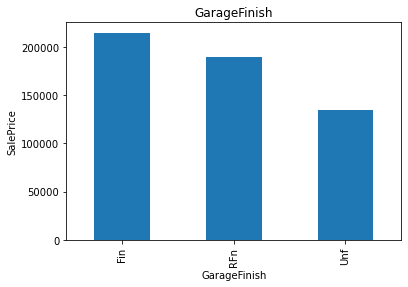

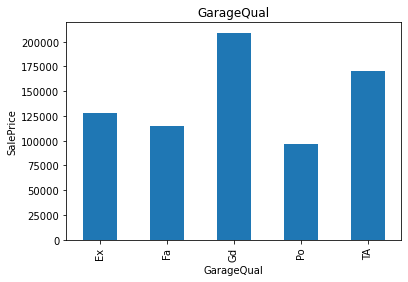

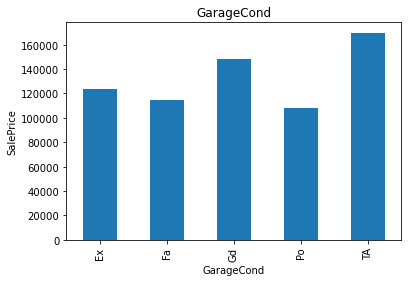

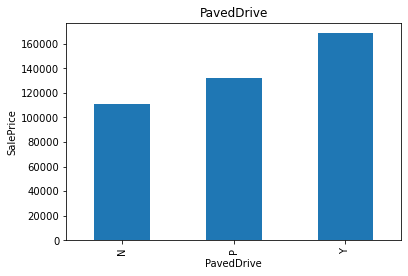

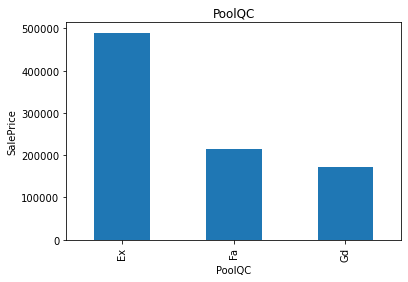

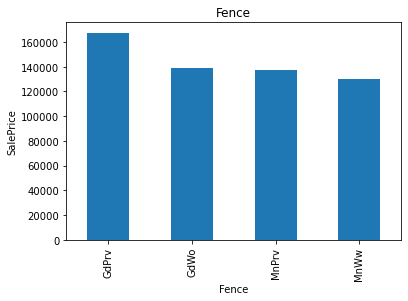

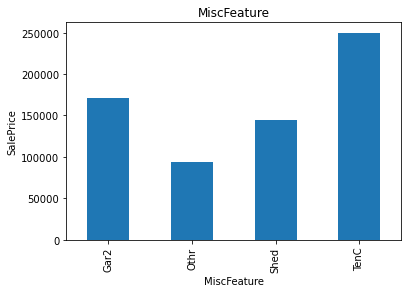

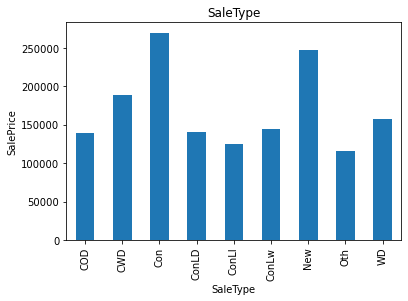

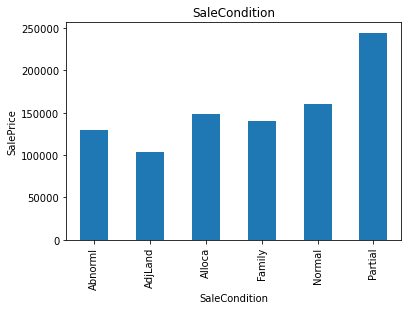

In [18]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
        

### Observation: 

1. There are features which have monotonic relationship (ordinal features)
2. We have neighbourhood values
3. We also have binary values
    

## Checking for Outliers

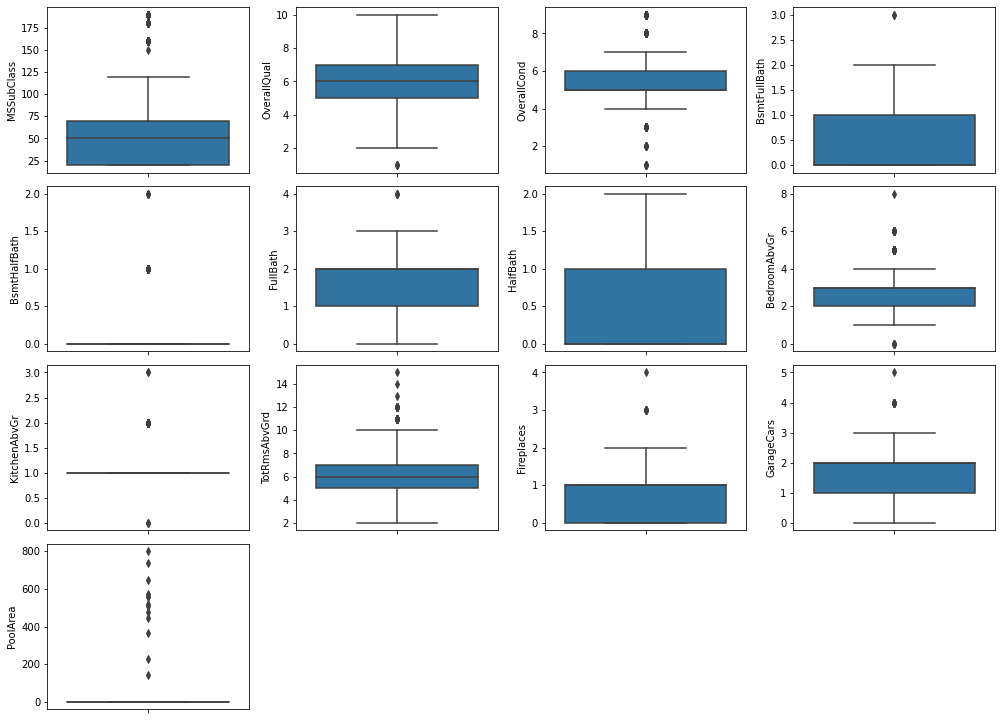

In [19]:
# in distinct features
xx = X[distinct_numeric_features].copy()
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(distinct_numeric_features):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data= xx.dropna())
fig.tight_layout(pad=1.0)

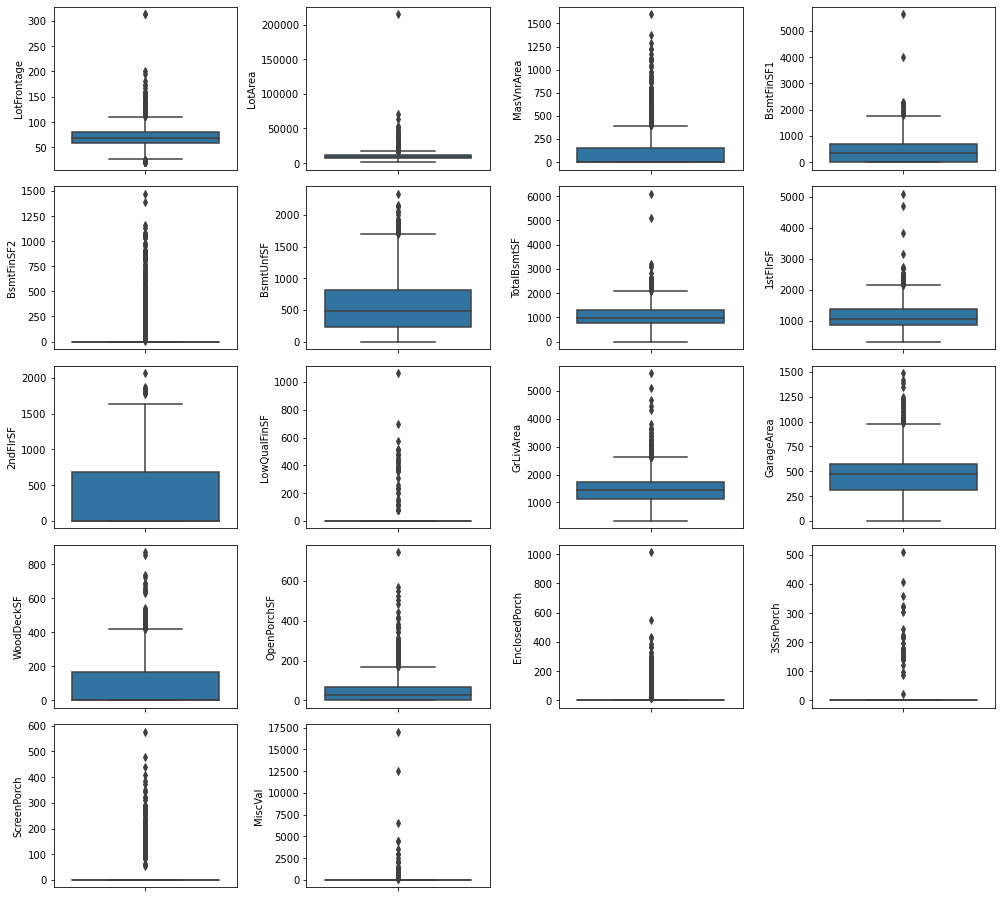

In [20]:
# in continous features
xx = X[continious_numeric_features].copy()
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(continious_numeric_features):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data= xx.dropna())
fig.tight_layout(pad=1.0)

Observation

1. There are many outliers. 
2. But we cannot remove outliers based only on Univeriate analysis.
3. We will only remove extreme outliers in relationship with our dependent variable later in feature Eng.!!

<a id="sec2"></a>

# 2. Feature Engeneering

We will perform these steps under Feature Engeneering:

1. [Missing Values](#sec2.1)
2. [Removing Outliers](#sec2.2)
3. [Feature_engineering on Temporal features](#sec2.3)
4. [Changing data-types](#sec2.4)
5. [Feature_engineering on Numeric features](#sec2.5)
6. [Biveriate analysis](#sec2.6)
7. [Label-encoding of Ordinal features](#sec2.7)
8. [Transformation](#sec2.8)
8. [One-hot encoding](#sec2.9)


<a id="sec2.1"></a>
### 2.1:  Missing Values

In [21]:
# 1. Missing Values in continious_numeric_features:

X[continious_numeric_features].isnull().sum()

LotFrontage      486
LotArea            0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
MiscVal            0
dtype: int64

In [22]:
#Filling missing Values:

for feature in continious_numeric_features:
    X[feature] = X.groupby("Neighborhood")[feature].transform(lambda x: x.fillna(x.median()))

In [23]:
# 2. Missing Values in distinct_numeric_features:
X[distinct_numeric_features].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      1
PoolArea        0
dtype: int64

In [24]:
#Filling missing Values:

for feature in distinct_numeric_features:
    X[feature] = X[feature].fillna(0)
    

In [25]:
# 3. Missing Values in Categorical_features:
X[categorical_features].isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [26]:
#Filling missing Values:


for feature in categorical_features:
    X[feature] = X[feature].fillna("Missing")

In [27]:
# 4.Missing Values in Categorical_features:
X[temporal_features].isnull().sum()
    

YearBuilt         0
YearRemodAdd      0
GarageYrBlt     159
MoSold            0
YrSold            0
dtype: int64

In [28]:
X[X['GarageYrBlt'].isnull()]

## Its clear GarageYrBLT missing-values means no garage when checked with corresponding features.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,Missing,Missing,Missing,Missing,0.0,Missing,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,6,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,N,0,0,0,0,0,0,Missing,Missing,Missing,0,6,2008,WD,AdjLand
49,190,RM,33.0,4456,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,736.0,736.0,GasA,Gd,Y,SBrkr,736,716,0,1452,0.0,0.0,2,0,2,3,TA,8,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,N,0,0,102,0,0,0,Missing,Missing,Missing,0,6,2009,New,Partial
79,90,RL,72.0,10778,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1768.0,1768.0,GasA,TA,N,SBrkr,1768,0,0,1768,0.0,0.0,2,0,4,2,TA,8,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal
89,50,C (all),105.0,8470,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,TA,N,SBrkr,1013,0,513,1526,0.0,0.0,1,0,2,1,Fa,6,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,N,0,0,156,0,0,0,Missing,MnPrv,Missing,0,10,2009,ConLD,Abnorml
90,20,RL,60.0,8070,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,50,C (all),60.0,8520,Grvl,Missing,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,3,5,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Fa,Fa,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,Fa,N,SBrkr,576,360,0,936,0.0,0.0,1,0,2,1,TA,6,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,N,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2006,WD,Normal
2910,180,RM,21.0,1470,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,3,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2006,WD,Normal
2914,160,RM,21.0,1526,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,

In [29]:
for feature in temporal_features:
    X[feature] = X[feature].fillna(0)

<a id="sec2.2"></a>
### 2.2:  Removing Outliers

After Performing log transformation, There are still some extreme outliers which are still not close enough to the population because of their extremeity. And it make sense to remove them!!  (Graphs in previous chapter)

### Train-data

In [30]:
drop = [] 

drop.append(dataset[(dataset['LotFrontage']>300) & (dataset['SalePrice']<300000)].index.tolist())

dataset = dataset.drop(dataset[(dataset['LotFrontage']>300) & (dataset['SalePrice']<300000)].index)

In [31]:
drop.append(dataset.loc[dataset['1stFlrSF']>4000].index.tolist())

dataset =  dataset.drop(dataset.loc[dataset['1stFlrSF']>4000].index)

In [32]:
drop.append(dataset[(dataset['GrLivArea']>4000) & (dataset['SalePrice']<300000)].index.tolist())

dataset = dataset.drop(dataset[(dataset['GrLivArea']>4000) & (dataset['SalePrice']<300000)].index)

In [33]:
drop.append(dataset[(dataset['OpenPorchSF']>500) & (dataset['SalePrice']<100000)].index.tolist())

dataset = dataset.drop(dataset[(dataset['OpenPorchSF']>500) & (dataset['SalePrice']<100000)].index)

In [34]:
flat_list = [item for sublist in drop for item in sublist]

In [35]:
flat_list = list(set(flat_list))

### Combined-data

In [36]:
X = X.drop(X.loc[flat_list,:].index)

<a id="sec2.3"></a>
### 2.3: Feature_engineering on Temporal features

In [37]:
temporal_features


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [38]:
## by this we converted dates into a continous features

for feature in temporal_features:
    if feature == 'YrSold' or feature == 'MoSold' :
        pass
    else:
        dataset[feature] = dataset['YrSold'] - dataset[feature]
        X[feature] = X['YrSold'] - X[feature]
        
        

In [39]:
## These cant be converted, therefore we will transform them into String-values as dates are nothing but string based categorical features

X['YrSold'] = X['YrSold'].astype(str)
X['MoSold'] = X['MoSold'].astype(str)

dataset['YrSold'] = dataset['YrSold'].astype(str)
dataset['MoSold'] = dataset['MoSold'].astype(str)


<a id="sec2.4"></a>
### 2.4: Changing Data Type


In [40]:
# this feature is a categorical feature mapped under some numbers!! (please refer the text. file)

#train-data
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)

#combined_data
X['MSSubClass'] = X['MSSubClass'].apply(str)



<a id="sec2.5"></a>
### 2.5: Feature_engineering on Numeric features

In [41]:
X['TotalHouseSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
dataset['TotalHouseSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']

X['TotalLot'] = X['LotFrontage'] + X['LotArea']
dataset['TotalLot'] = dataset['LotFrontage'] + dataset['LotArea']


X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
dataset['TotalBsmtFin'] = dataset['BsmtFinSF1'] + dataset['BsmtFinSF2']

X['TotalBath'] = X['FullBath'] + X['HalfBath']
dataset['TotalBath'] = dataset['FullBath'] + dataset['HalfBath']

X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']
dataset['TotalPorch'] = dataset['OpenPorchSF'] + dataset['EnclosedPorch']  + dataset['ScreenPorch']




<a id="sec2.6"></a>
### 2.6: Biveriate analysis

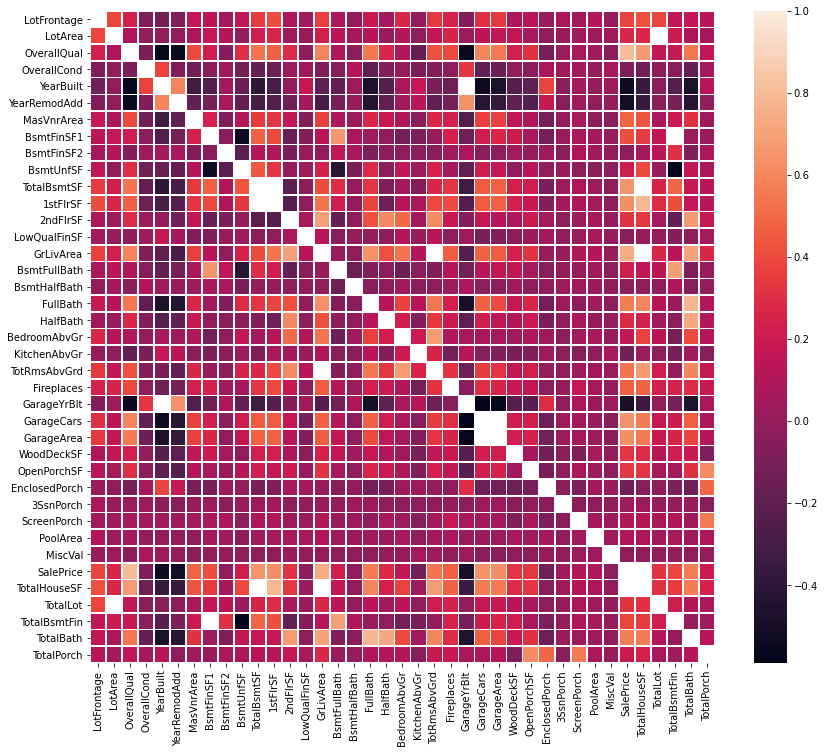

In [42]:
numeric_= dataset.select_dtypes(exclude=['object']).copy()
#numeric_.columns

plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation >0.8, linewidth=0.7)

In [43]:
## features with multi-collinearity

# 'TotalBsmtFin', 'BsmtFinSF1' ; 'TotalLot', 'LotArea' ; 'TotalHouseSF' , 'TotalBsmtSF' , 'GrLivArea' ; 'YearBuilt', 'GarageYrBlt' ; 'TotRmsAbvGrd', 'GrLivArea' ; '1stFlrSF', 'TotalBsmtSF'; 'GarageArea', 'GarageCars'

In [44]:
correlation = numeric_.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)



,SalePrice
SalePrice,1.000000
TotalHouseSF,0.832724
OverallQual,0.795341
GrLivArea,0.734340
TotalBsmtSF,0.652051
GarageCars,0.640021
1stFlrSF,0.631211
GarageArea,0.628258
TotalBath,0.569597
FullBath,0.561542


In [45]:
X.drop(['TotalBsmtFin','LotArea','TotalBsmtSF','GrLivArea','GarageYrBlt','GarageArea'],axis=1,inplace=True)

dataset.drop(['TotalBsmtFin','LotArea','TotalBsmtSF','GrLivArea','GarageYrBlt','GarageArea'],axis=1,inplace=True)

<a id="sec2.7"></a>
### 2.7: Label encoding of Ordinal features



In [46]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X[c].values)) 
    X[c] = lbl.transform(list(X[c].values))
    
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dataset[c].values)) 
    dataset[c] = lbl.transform(list(dataset[c].values))




In [47]:
## Some more feature Engineering

X["TotalGarageQual"] = X["GarageQual"] * X["GarageCond"]
X["TotalExteriorQual"] = X["ExterQual"] * X["ExterCond"]


dataset["TotalGarageQual"] = dataset["GarageQual"] * dataset["GarageCond"]
dataset["TotalExteriorQual"] = dataset["ExterQual"] * dataset["ExterCond"]


<a id="sec2.8"></a>
### 2.8: Transformation

In [48]:
numeric_feats = X.dtypes[X.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness



Skew in numerical features: 



,Skew
MiscVal,21.932147
PoolArea,17.682542
TotalLot,13.108226
LowQualFinSF,12.080315
3SsnPorch,11.368094
LandSlope,4.993598
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.005565
ScreenPorch,3.943508




Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+𝑥

.

Note that setting 𝜆=0

is equivalent to log1p used above for the target variable.

See [this page][1] for more details on Box Cox Transformation as well as [the scipy function's page][2] [1]: http://onlinestatbook.com/2/transformations/box-cox.html [2]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html

In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    X[feat] = boxcox1p(X[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [50]:
X['YearRemodAdd'] = X['YearRemodAdd'].fillna(0) 

<a id="sec2.9"></a>
### 2.9: One-hot encoding

In [51]:
X = pd.get_dummies(X)

### Removing Overfitted Features

In [52]:
features_to_be_dropped = []
for feature in X.columns:
    all_value_counts = X[feature].value_counts()
    zero_value_counts = all_value_counts.iloc[0]
    if zero_value_counts / len(X) > 0.995:
        features_to_be_dropped.append(feature)
print('\nFeatures with predominant zeroes:\n')
print(features_to_be_dropped)

X.drop(features_to_be_dropped,axis=1,inplace=True)


Features with predominant zeroes:

['Street', 'PoolArea', 'PoolQC', 'MSZoning_Missing', 'Utilities_AllPub', 'Utilities_Missing', 'Utilities_NoSeWa', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Missing', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Missing', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Foundation_Stone', 'Foundation_Wood', 'Heating_Floor', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Electrical_FuseP', 'Electrical_Missing', 'Electrical_Mix', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_TenC', 'SaleType_C

# Modelling

<p style="text-align: justify">An advanced, cross-validation supported regression approach is proposed herein. The strategy includes:</p>
<ol>
    <li style="text-align: justify">Generation of 'n' predictions from a set of 'n' selected regression engines (models);</li>
    <li style="text-align: justify">Generation of an additional prediction from one selected stacking model, which aggregates predictions from the 'n' regression engines utilized in (1);</li>
    <li style="text-align: justify">Generation of a final prediction through a blending mechanism combining weighed predictions from each of the 'n' predictions obtained in (1) plus the prediction of the stacking model obtained in (2).</li>
</ol>

In [53]:

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor


In [54]:
def xval_rmse_scoring(f_model, f_X, f_y, f_cv):
    """
    Returns a machine learning model cross-validated score based on the Root Mean Squared Error (RMSE) metric.
    
    Keyword arguments:
    
    f_model     Machine learning model.
                Object instance
    f_X_        Tensor containing features for modeling.
                Pandas dataframe
    f_y         Tensor containing targets for modeling.
                Pandas series
    f_cv        Cross-validation splitting strategy.
                Please refer to scikit-learn's model_selection cross_val_score for further information.
    """
    return np.sqrt(-cross_val_score(f_model, f_X, f_y,
                                    scoring='neg_mean_squared_error',
                                    cv=f_cv))


In [55]:
X_train = X.loc[dataset.index,:]
X_test = X.loc[test.Id,:]
y_train = np.log1p(dataset['SalePrice']).values

In [56]:
kfolds = KFold(n_splits=7, shuffle=True, random_state=42)

 ### Model definition

<p style="text-align: justify">Six regression models (ElasticNetCV, LassoCV, RidgeCV, GradientBoostingRegressor, SVR and XGBoost), covering a variety of regression strategies, techniques, cross-validation capabilities and regularization features, have been elected in this exercise. Each of them has been individually tuned to minimize error metrics and best fit the training set. Referring to the each regressor documentation is highly recommended (clickable links provided in Section 2.1.). The parameters listed below are the best obtained from these individual fitting rounds.</p>
<p style="text-align: justify">Two additional regressors have also been considered:</p>
<ul>
    <li style="text-align: justify">RandomForestRegressor did not provide any substantial improvement to performance metrics and was discarded;</li>
    <li style="text-align: justify">CatBoostRegressor marginally contributed to performance metric improvements but was at last discarded due to its extremely long execution time (not even the recommendations provided <a href="https://catboost.ai/docs/concepts/speed-up-training.html">here</a> sufficed to reduce the execution time penalty).</li>
</ul>
<p style="text-align: justify">StackingCV has been chosen as the stacking regressor. In summary, StackingCV collects predictions derived from the six primary regressors and, making use of one of them, denominated 'meta regressor' (XGBoost was chosen in this exercise), produces a combined ('stacked') prediction.</p>

In [57]:
elasticnet_alphas = [5e-5, 1e-4, 5e-4, 1e-3]
elasticnet_l1ratios = [0.8, 0.85, 0.9, 0.95, 1]
elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=elasticnet_alphas,
                                        cv=kfolds, l1_ratio=elasticnet_l1ratios))

lasso_alphas = [5e-5, 1e-4, 5e-4, 1e-3]
lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=lasso_alphas,
                              random_state=42, cv=kfolds))

ridge_alphas = [13.5, 14, 14.5, 15, 15.5]
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=ridge_alphas, cv=kfolds))

gradb = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01,
                                  max_depth=4, max_features='sqrt',
                                  min_samples_leaf=15, min_samples_split=10,
                                  loss='huber', random_state=42)

svr = make_pipeline(RobustScaler(),
                    SVR(C=20, epsilon=0.008, gamma=0.0003))

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=6000,
                       max_depth=3, min_child_weight=0,
                       gamma=0, subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror', nthread=-1,
                       scale_pos_weight=1, seed=27,
                       reg_alpha=0.00006, random_state=42)

stackcv = StackingCVRegressor(regressors=(elasticnet, gradb, lasso, 
                                          ridge, svr, xgboost),
                              meta_regressor=xgboost,
                              use_features_in_secondary=True)

### Individual model performance on cross-validation

<p style="text-align: justify">Each of the six elected regression models is hereby submitted to scoring based on the Root Mean Squared Error (RMSE) metric (mean and standard deviation provided through cross-validation). This step offers a first glance at individual model performance and is intended to support and frame subsequent stacking and blending phases.</p>

In [58]:
print('Individual model scoring on cross-validation\n')
print(f'{"Model":<20}{"RMSE mean":>12}{"RMSE stdev":>12}\n')

score = xval_rmse_scoring(elasticnet, X_train, y_train, kfolds)
print(f'{"1. ElasticNetCV":<20}{score.mean():>12.4f}{score.std():>12.4f}')

score = xval_rmse_scoring(lasso, X_train, y_train, kfolds)
print(f'{"2. LassoCV":<20}{score.mean():>12.4f}{score.std():>12.4f}')

score = xval_rmse_scoring(ridge, X_train, y_train, kfolds)
print(f'{"3. RidgeCV":<20}{score.mean():>12.4f}{score.std():>12.4f}')

score = xval_rmse_scoring(gradb, X_train, y_train, kfolds)
print(f'{"4. GradientBoosting":<20}{score.mean():>12.4f}{score.std():>12.4f}')

score = xval_rmse_scoring(svr, X_train, y_train, kfolds)
print(f'{"5. SVR":<20}{score.mean():>12.4f}{score.std():>12.4f}')

score = xval_rmse_scoring(xgboost, X_train, y_train, kfolds)
print(f'{"6. XGBoost":<20}{score.mean():>12.4f}{score.std():>12.4f}')

Individual model scoring on cross-validation

Model                  RMSE mean  RMSE stdev

1. ElasticNetCV           0.1140      0.0101
2. LassoCV                0.1141      0.0102
3. RidgeCV                0.1140      0.0099
4. GradientBoosting       0.1125      0.0106
5. SVR                    0.1112      0.0107
6. XGBoost                0.1139      0.0090


### Individual model fitting to the training set

In [59]:
print('\nFitting individual models to the training set\n')
print(f'{"1. ElasticNetCV...":<20}')
elastic_fit = elasticnet.fit(X_train, y_train)
print(f'{"2. LassoCV...":<20}')
lasso_fit = lasso.fit(X_train, y_train)
print(f'{"3. RidgeCV...":<20}')
ridge_fit = ridge.fit(X_train, y_train)
print(f'{"4. GradientBoosting...":<20}')
gradb_fit = gradb.fit(X_train, y_train)
print(f'{"5. SVR...":<20}')
svr_fit = svr.fit(X_train, y_train)
print(f'{"6. XGBoost...":<20}')
xgb_fit = xgboost.fit(X_train, y_train)

print('\nFitting the stacking model to the training set\n')
print(f'{"StackingCV...":<20}')
stackcv_fit = stackcv.fit(np.array(X_train), np.array(y_train))


Fitting individual models to the training set

1. ElasticNetCV...  
2. LassoCV...       
3. RidgeCV...       
4. GradientBoosting...
5. SVR...           
6. XGBoost...       

Fitting the stacking model to the training set

StackingCV...       


### Blend model construction

<p style="text-align: justify">Blending proved extremely helpful on the enhancement of error metrics in this exercise. A slight modification in weights attributed to individual regression inputs (predictions on the training set) led to either awesome improvement or awful deterioration of error metrics.</p>
<p style="text-align: justify">A manual, detailed (though time consuming...) weight adjustment program was executed. Starting from a set of uniformly distributed weights for each prediction, weights were manually redistributed with a 1% minimum granularity. In practical terms, the method consisted in manually decreasing the weight of one particular prediction in 1%, manually increasing the weight of another particular prediction in 1% and observing the impact of such changes on the error metrics. The procedure was repeated iteratively until no further improvement of error estimates was achieved.</p>
<p style="text-align: justify">The list below reproduces the weights obtained after the optimization procedure described above.</p>

In [60]:
blend_weights = [0.11, 0.05, 0.00, 0.14, 0.43, 0.00, 0.27]

<p style="text-align: justify">Interestingly, weights associated with individually best performing regressors have their weights reduced during the weight optimization process. SVR accounts for most of the contribution to improved results, while RidgeCV and XGBoost have their contributions (surprisingly?) eclipsed by other regressors. As expected, StackingCV performed well and ranks second as a contributor.</p>

In [61]:
y_train = np.expm1(y_train)
y_pred = np.expm1((blend_weights[0] * elastic_fit.predict(X_train)) +
                  (blend_weights[1] * lasso_fit.predict(X_train)) +
                  (blend_weights[2] * ridge_fit.predict(X_train)) +
                  (blend_weights[3] * svr_fit.predict(X_train)) +
                  (blend_weights[4] * gradb_fit.predict(X_train)) +
                  (blend_weights[5] * xgb_fit.predict(X_train)) +
                  (blend_weights[6] * stackcv_fit.predict(np.array(X_train))))

##  Results

In [62]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)
print('\nBlend model performance on the training set\n')
print(f'{"RMSE":<7} {rmse:>15.8f}')
print(f'{"RMSLE":<7} {rmsle:>15.8f}')
print(f'{"MAE":<7} {mae:>15.8f}')


Blend model performance on the training set

RMSE     10416.67651787
RMSLE        0.06034117
MAE       6329.06332783


In [63]:
sub = pd.DataFrame()
sub['Id'] = X_test.index
sub['SalePrice'] = (np.expm1((blend_weights[0] * elastic_fit.predict(X_test)) +
                                            (blend_weights[1] * lasso_fit.predict(X_test)) +
                                            (blend_weights[2] * ridge_fit.predict(X_test)) +
                                            (blend_weights[3] * svr_fit.predict(X_test)) +
                                            (blend_weights[4] * gradb_fit.predict(X_test)) +
                                            (blend_weights[5] * xgb_fit.predict(X_test)) +
                                            (blend_weights[6] * stackcv_fit.predict(np.array(X_test)))))

sub.to_csv('submission.csv',index=False)

In [64]:
sub

,Id,SalePrice
0,1461,118848.325910
1,1462,166135.194830
2,1463,187792.347914
3,1464,195785.219340
4,1465,188028.310089
...,...,...
1454,2915,82929.636522
1455,2916,81962.865709
1456,2917,166529.861096
1457,2918,118712.438478
